<a href="https://colab.research.google.com/github/beverast/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [8]:
# Load the data as a pandas data frame
import pandas as pd


survival_df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header=None)
survival_df.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [9]:
# Validate that it has the appropriate number of observations: 306 instances
survival_df.shape

(306, 4)

In [10]:
# Validate that you have no missing values
survival_df.isna().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [12]:
# Add informative names to the features
features = ['age', 'year_of_op', 'positive_nodes', 'survival_status']
survival_df.columns = features
survival_df.head()

,age,year_of_op,positive_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [17]:
# The survival variable is encoded as 1 for surviving >5 years and 2 for not - 
# change this to be 0 for not surviving and 1 for surviving >5 years
survival_df['survival_status'].replace(to_replace=[2], value=[0], inplace=True)
survival_df.head(5)

,age,year_of_op,positive_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [26]:
# Create at least 2 tables and 2 plots illustrating the nature of the data
pd.set_option('display.max_columns', 100)
pd.crosstab(index=survival_df['survival_status'], 
            columns=survival_df['positive_nodes'], normalize='index')

positive_nodes,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,28,30,35,46,52
survival_status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.234568,0.098765,0.061728,0.086420,0.037037,0.049383,0.037037,0.024691,0.024691,0.049383,0.012346,0.037037,0.012346,0.049383,0.012346,0.024691,0.000000,0.012346,0.000000,0.024691,0.012346,0.012346,0.012346,0.037037,0.012346,0.000000,0.000000,0.000000,0.012346,0.000000,0.012346
1,0.520000,0.146667,0.066667,0.057778,0.044444,0.008889,0.017778,0.022222,0.022222,0.008889,0.008889,0.004444,0.004444,0.004444,0.013333,0.004444,0.004444,0.000000,0.004444,0.004444,0.004444,0.000000,0.008889,0.000000,0.000000,0.004444,0.004444,0.004444,0.000000,0.004444,0.000000


In [55]:
pd.crosstab(index=survival_df['survival_status'], 
            columns=survival_df['year_of_op'], normalize='index')

year_of_op,58,59,60,61,62,63,64,65,66,67,68,69
survival_status,,,,,,,,,,,,
0,0.148148,0.111111,0.049383,0.037037,0.086420,0.098765,0.098765,0.160494,0.074074,0.049383,0.037037,0.049383
1,0.106667,0.080000,0.106667,0.102222,0.071111,0.097778,0.102222,0.066667,0.097778,0.093333,0.044444,0.031111


In [59]:
print('Mean age: ', survival_df['age'].mean())
print('Mean positive nodes: ', survival_df['positive_nodes'].mean())
print('Mean survival status: ', survival_df['survival_status'].mean())

Mean age:  52.45751633986928
Mean positive nodes:  4.026143790849673
Mean survival status:  0.7352941176470589


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

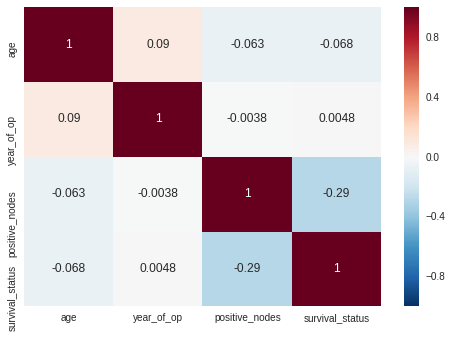

In [36]:
sns.heatmap(data=survival_df.corr(), annot=True);

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


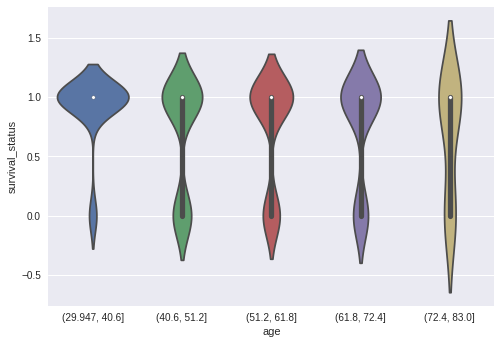

In [43]:
age_bins = pd.cut(survival_df['age'], 5)
sns.violinplot(data=survival_df, x=age_bins, y='survival_status');

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


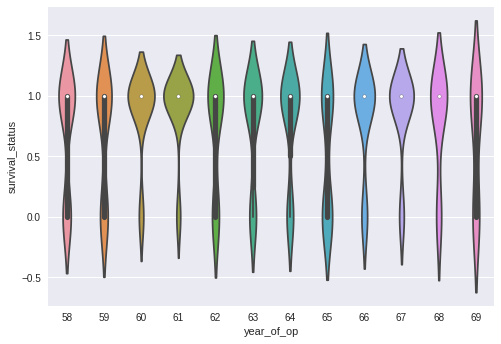

In [60]:
sns.violinplot(data=survival_df, x='year_of_op', y='survival_status');

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


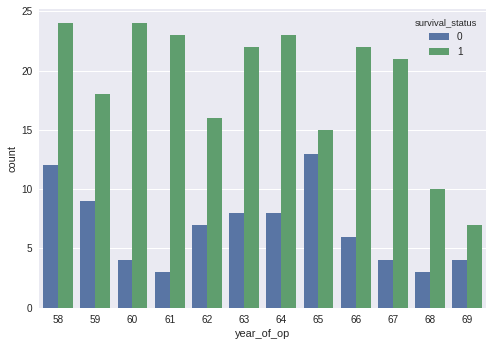

In [70]:
sns.countplot(x=survival_df['year_of_op'], hue=survival_df['survival_status']);

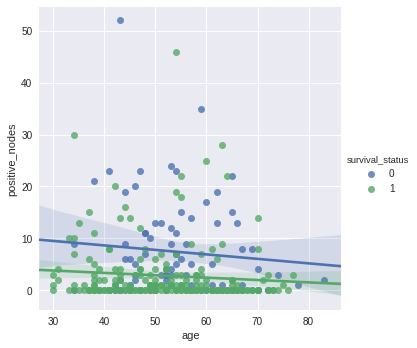

In [67]:
sns.lmplot(data=survival_df, x='age', y='positive_nodes', hue='survival_status');

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


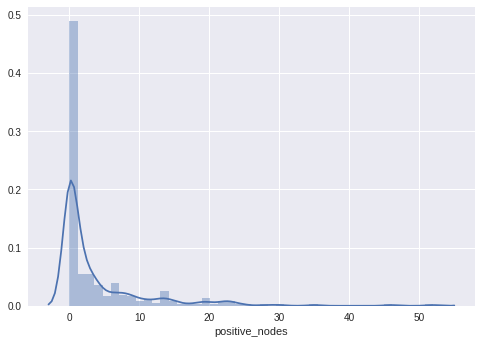

In [68]:
sns.distplot(survival_df['positive_nodes']);

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


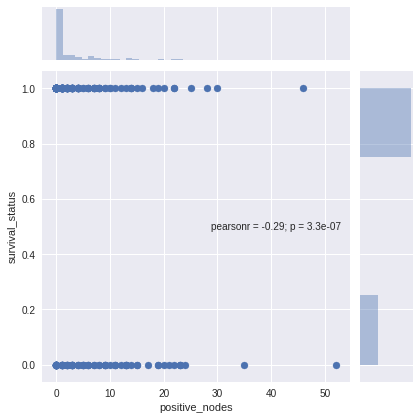

In [54]:
sns.jointplot(x='positive_nodes', y='survival_status', data=survival_df);

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

1. One feature that has a positive relationship with survival is the ```year_of_op```. The heatmap visualization shows it to be the only
feature that has a positive correlation to ```survival_status```. 

2. The feature that has the *most* negative relationship with ```survival_status``` is ```positive_nodes```.  It has a Pearson correlation 
coefficient of -0.29. The second most negative relationship with ```survival_rate``` is ```age```: -0.068.

3. From the population of people represented in this dataset, the information shows that oldest individuals were the least sampled of all age ranges, and that they also had a lower number of ```positive_nodes```, which could skew the data to seem as though age is a less important factor in survival rates. Also, the mean number of ```positive_nodes``` is 4.03 and most of people who didn't survive after 5 years had at least 5 to 10 nodes, as per the ```lmplot()``` graph of ```age``` vs ```positive_nodes```. This might also skew the results because more data might refute the correlation between the number of ```positive_nodes``` and ```survival_status```, and show more correlation with ```age```. 
As for the relationship between ```year_of_op``` and ```survival_status``` I would say that even though there is a slightly positive relationship, the two most recent years in the dataset, 1968 and 1969, are very under-sampled, and the amount of data severely drops off. I think that if there were more data points for those years then there might be a stronger correlation between ```year_of_op``` and ```survival_status``` simply because of advancements in medical technology, though the ratio of survivors vs those who have deceased is on par with the previous years sampled in the dataset.
